In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def create_pathway(n):
    generated_steps = []
    for i in range(0, n+1):
        right_step = random.choice(['left', 'right'])
        generated_steps.append(right_step)
    return generated_steps

100.0


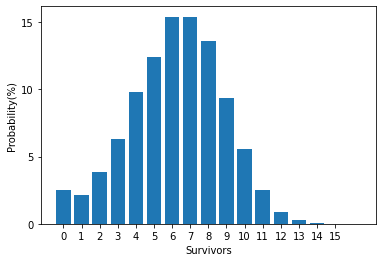

In [3]:
last_step_record = []
first_survivor_record = []
max_player = 16
survivor_record = []
max_step = 18
x = 10000

for i in range(1, x + 1): #run X number of games
    player_number = 1
    starting_step = 1
    last_step = starting_step
    step_record = [] # create a record of last step for each game
    steps = create_pathway(max_step) # create a new pathway for each game
    for player_number in range(1, max_player + 1): 
        for j in range(starting_step, max_step + 1): # this is the horrible experience of each player
            # j is the glass on which a player is standing
            # starting_step is the number of tile in the tempered glass pathway from which a player starts
            # for player number 1 the starting step is zero as defined above
            # other players pick up where their previous player left 
            step_choice = random.choice(['left', 'right']) # generate a choice
            # generate a random choice made by a player for each step
            if step_choice == steps[starting_step - 1]: # if the player makes a right choice
                j += 1 # if the choice for each tile is correct, the player advances to the next tile
            else: # if the player makes a wrong choice
                last_step = j # this is the last tile of each player    
                break # end the game for a player 
        player_number += 1 # next player's turn
        starting_step = last_step + 1 # starting point for next player 
        step_record.append(last_step) # record the last step of every players for each game
        survivors = step_record.count(max_step) # count the number of survivors
    if max_step in step_record: # check the first survivor's player number
        first_survivor = step_record.index(max_step) 
        first_survivor_record.append(first_survivor + 1)
    else:
        first_survivor_record.append(0)
    last_step_record.append(last_step) # record last step for each grame
    survivor_record.append(survivors) # record the number of survivor(s) for each game 
    
person_list = list(range(0, max_player + 1))
probability_list = []
prob_each_player_record = []
for i in range(0, max_player + 1 ):
    probs = survivor_record.count(i)
    probability_list.append(probs/x*100)
    prob_each_player = first_survivor_record.count(i)
    prob_each_player_record.append(prob_each_player/x*100)

print(np.sum(probability_list))
plt.bar(person_list, probability_list)

# Setting the interval of ticks of x-axis to 5.
listOf_Xticks = np.arange(0, 16, 1)
plt.xticks(listOf_Xticks)
 
# Setting the interval of ticks of y-axis to 10.
listOf_Yticks = np.arange(0, 20, 5)
plt.yticks(listOf_Yticks)
plt.xlabel('Survivors')
plt.ylabel('Probability(%)')
plt.show()

In [4]:
df = pd.DataFrame(prob_each_player_record, columns = ['Survival probability'])
df['Cummulative probability'] = df['Survival probability'].cumsum(axis = 0)

In [5]:
df

,Survival probability,Cummulative probability
0,2.55,2.55
1,0.00,2.55
2,0.01,2.56
3,0.03,2.59
4,0.29,2.88
5,0.86,3.74
6,2.52,6.26
7,5.56,11.82
8,9.36,21.18
9,13.57,34.75


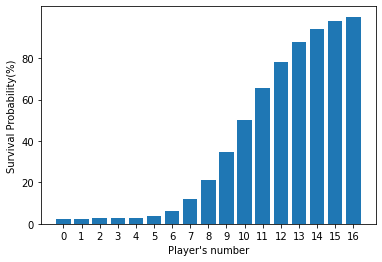

In [6]:
plt.bar(df.index, df['Cummulative probability'])
#plt.title('Survival probability % vs Number of players')
# Setting the interval of ticks of x-axis to 5.
listOf_Xticks = np.arange(0, 17, 1)
plt.xticks(listOf_Xticks)
 
# Setting the interval of ticks of y-axis to 10.
listOf_Yticks = np.arange(0, 100, 20)
plt.yticks(listOf_Yticks)

plt.xlabel("Player's number")
plt.ylabel('Survival Probability(%)')
plt.show()